# Titanic passengers

#### Goal: will a person survive or not?

#### Metrics: accuracy

In [ ]:

# import libraries
import warnings
warnings.filterwarnings('ignore')

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
# read data and get train info

from google.colab import drive
drive.mount('/content/drive')

train = pd.read_csv('/content/drive/My Drive/train.csv')
test = pd.read_csv('/content/drive/My Drive/test.csv')
train.info()


Mounted at /content/drive
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [ ]:
# get statisitcs  
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
# show the overall survival rate 
print('Overall Survival Rate:', round(train['Survived'].mean(), 3))

Overall Survival Rate: 0.384


## Data cleaning and feature selection

In [ ]:
# get_dummies function
def dummies(col,train,test):
    train_dum = pd.get_dummies(train[col])
    test_dum = pd.get_dummies(test[col])
    train = pd.concat([train, train_dum], axis=1)
    test = pd.concat([test,test_dum],axis=1)
    train.drop(col,axis=1,inplace=True)
    test.drop(col,axis=1,inplace=True)
    return train, test

# delete the useless cols
dropping = ['PassengerId', 'Name', 'Ticket']
train.drop(dropping,axis=1, inplace=True)
test.drop(dropping,axis=1, inplace=True)

In [ ]:
train

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,NaN,S
1,1,1,female,38.0,1,0,71.2833,C85,C
2,1,3,female,26.0,0,0,7.9250,NaN,S
3,1,1,female,35.0,1,0,53.1000,C123,S
4,0,3,male,35.0,0,0,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,NaN,S
887,1,1,female,19.0,0,0,30.0000,B42,S
888,0,3,female,NaN,1,2,23.4500,NaN,S
889,1,1,male,26.0,0,0,30.0000,C148,C


3    491
1    216
2    184
Name: Pclass, dtype: int64


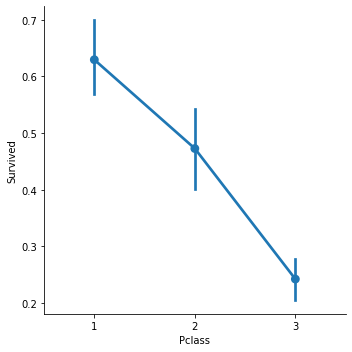

In [ ]:
# Pclass
# ensure no NA contained
print(train.Pclass.value_counts(dropna=False))
sns.factorplot('Pclass', 'Survived',data=train, order=[1,2,3])
# according to the graph, we found there are huge differences between
# each pclass group. keep the ft
train, test = dummies('Pclass', train, test)

In [ ]:
train

,Survived,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,1,2,3
0,0,male,22.0,1,0,7.2500,NaN,S,0,0,1
1,1,female,38.0,1,0,71.2833,C85,C,1,0,0
2,1,female,26.0,0,0,7.9250,NaN,S,0,0,1
3,1,female,35.0,1,0,53.1000,C123,S,1,0,0
4,0,male,35.0,0,0,8.0500,NaN,S,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
886,0,male,27.0,0,0,13.0000,NaN,S,0,1,0
887,1,female,19.0,0,0,30.0000,B42,S,1,0,0
888,0,female,NaN,1,2,23.4500,NaN,S,0,0,1
889,1,male,26.0,0,0,30.0000,C148,C,1,0,0


male      577
female    314
Name: Sex, dtype: int64


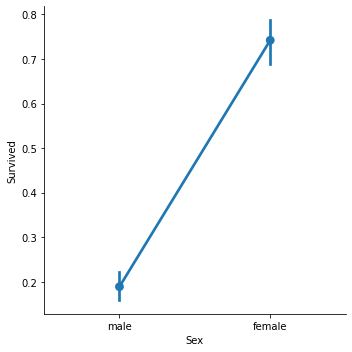

In [ ]:
# sex
print(train.Sex.value_counts(dropna=False))
sns.factorplot('Sex','Survived', data=train)
# female survival rate is way better than the male
train, test = dummies('Sex', train, test)

#train.drop('male',axis=1,inplace=True)
#test.drop('male',axis=1,inplace=True)

In [ ]:
train

,Survived,Age,SibSp,Parch,Fare,Cabin,Embarked,1,2,3,female,male
0,0,22.0,1,0,7.2500,NaN,S,0,0,1,0,1
1,1,38.0,1,0,71.2833,C85,C,1,0,0,1,0
2,1,26.0,0,0,7.9250,NaN,S,0,0,1,1,0
3,1,35.0,1,0,53.1000,C123,S,1,0,0,1,0
4,0,35.0,0,0,8.0500,NaN,S,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,27.0,0,0,13.0000,NaN,S,0,1,0,0,1
887,1,19.0,0,0,30.0000,B42,S,1,0,0,1,0
888,0,NaN,1,2,23.4500,NaN,S,0,0,1,1,0
889,1,26.0,0,0,30.0000,C148,C,1,0,0,0,1


In [ ]:
# age 
# dealing with the missing data
nan_num = train['Age'].isnull().sum()
print(nan_num)

177


In [ ]:
# there are 177 missing value, fill with random int
age_mean = train['Age'].mean()
age_std = train['Age'].std()
filling = np.random.randint(age_mean-age_std, age_mean+age_std, size=nan_num)
train['Age'][train['Age'].isnull()==True] = filling
nan_num = train['Age'].isnull().sum()
print(nan_num)

0


In [ ]:
# dealing the missing val in test
nan_num = test['Age'].isnull().sum()

In [ ]:
# 86 null
age_mean = test['Age'].mean()
age_std = test['Age'].std()
filling = np.random.randint(age_mean-age_std,age_mean+age_std,size=nan_num)
test['Age'][test['Age'].isnull()==True]=filling
nan_num = test['Age'].isnull().sum()
print(nan_num)

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64
0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64


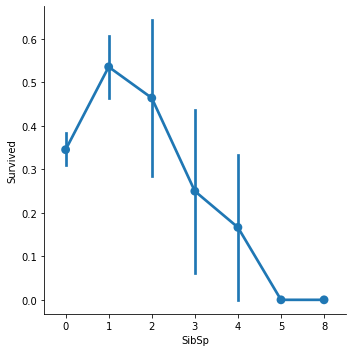

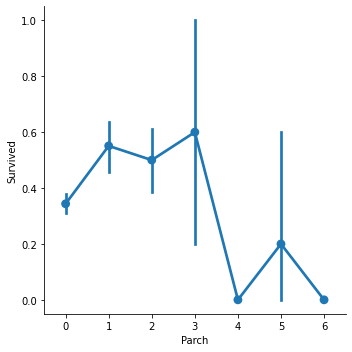

In [ ]:
# family
print(train['SibSp'].value_counts(dropna=False))
print(train['Parch'].value_counts(dropna=False))

sns.factorplot('SibSp','Survived',data=train,size=5)
sns.factorplot('Parch','Survived',data=train,size=5)


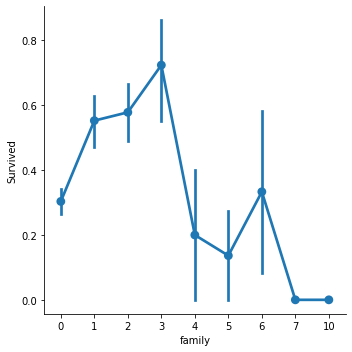

In [ ]:
'''It seems that with more family members, 
the survival rate will drop, we can create the new feature
adding up the "Parch" and "Sibsp" ''' 

train['family'] = train['SibSp'] + train['Parch']
test['family'] = test['SibSp'] + test['Parch']
sns.factorplot('family','Survived',data=train,size=5)

train.drop(['SibSp','Parch'],axis=1,inplace=True)
test.drop(['SibSp','Parch'],axis=1,inplace=True)

In [ ]:
train

,Survived,Age,Fare,Cabin,Embarked,1,2,3,female,male,family
0,0,22.0,7.2500,NaN,S,0,0,1,0,1,1
1,1,38.0,71.2833,C85,C,1,0,0,1,0,1
2,1,26.0,7.9250,NaN,S,0,0,1,1,0,0
3,1,35.0,53.1000,C123,S,1,0,0,1,0,1
4,0,35.0,8.0500,NaN,S,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
886,0,27.0,13.0000,NaN,S,0,1,0,0,1,0
887,1,19.0,30.0000,B42,S,1,0,0,1,0,0
888,0,29.0,23.4500,NaN,S,0,0,1,1,0,3
889,1,26.0,30.0000,C148,C,1,0,0,0,1,0


In [ ]:
# fare
print(train.Fare.isnull().sum())
print(test.Fare.isnull().sum())

0
1


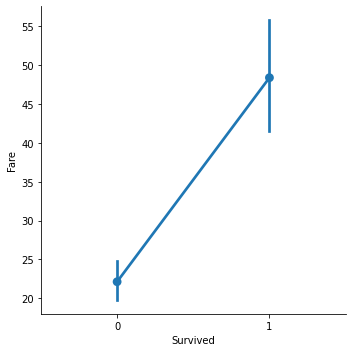

In [ ]:
sns.factorplot('Survived','Fare',data=train,size=5)
test['Fare'].fillna(test['Fare'].median(),inplace=True)

In [ ]:
# Cabin
# checking missing val
# 687 out of 891 are missing, drop this col
train.Cabin.isnull().sum()

687

In [ ]:
train.drop('Cabin',axis=1,inplace=True)
test.drop('Cabin',axis=1,inplace=True)

In [ ]:
# Embark
print(train.Embarked.isnull().sum())
# 2 missing value
train.Embarked.value_counts()

2


S    644
C    168
Q     77
Name: Embarked, dtype: int64

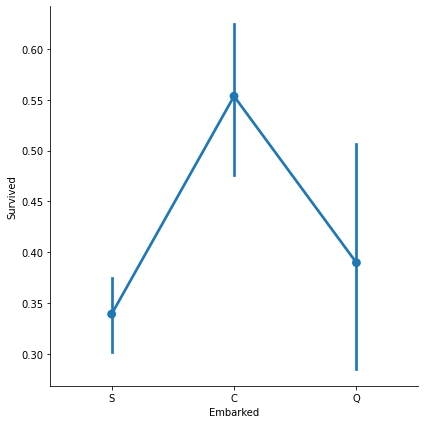

In [ ]:
# fill the majority val,'s', into missing val col
train['Embarked'].fillna('S',inplace=True)

sns.factorplot('Embarked','Survived',data=train,size=6)
train,test = dummies('Embarked',train,test)


In [ ]:
train

,Survived,Age,Fare,1,2,3,female,male,family,C,Q,S
0,0,22.0,7.2500,0,0,1,0,1,1,0,0,1
1,1,38.0,71.2833,1,0,0,1,0,1,1,0,0
2,1,26.0,7.9250,0,0,1,1,0,0,0,0,1
3,1,35.0,53.1000,1,0,0,1,0,1,0,0,1
4,0,35.0,8.0500,0,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,27.0,13.0000,0,1,0,0,1,0,0,0,1
887,1,19.0,30.0000,1,0,0,1,0,0,0,0,1
888,0,29.0,23.4500,0,0,1,1,0,3,0,0,1
889,1,26.0,30.0000,1,0,0,0,1,0,1,0,0


## Model and prediction

In [ ]:
# import machine learning libraries
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split


X=train.drop('Survived',axis=1)
y=train['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)


# check classification scores of logistic regression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)


print('Train/Test split results:')
print(logreg.__class__.__name__+" accuracy is %2.3f" % accuracy_score(y_test, y_pred))


Train/Test split results:
LogisticRegression accuracy is 0.777


## CrossValidation


In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn import svm

X, y = datasets.load_iris(return_X_y=True)
X.shape, y.shape

((150, 4), (150,))

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.4, random_state=0)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)


clf = svm.SVC(kernel='linear').fit(X_train, y_train)
clf.score(X_test, y_test)


(90, 4) (90,)
(60, 4) (60,)


0.9666666666666667

In [ ]:
from sklearn.model_selection import cross_val_score
clf = svm.SVC(kernel='linear', random_state=42)
scores = cross_val_score(clf, X, y, cv=20)
scores

array([1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       0.71428571, 1.        , 1.        , 1.        , 0.85714286,
       1.        , 1.        , 1.        , 1.        , 1.        ])

In [ ]:
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

0.98 accuracy with a standard deviation of 0.07


In [ ]:
from sklearn import metrics
scores = cross_val_score(
    clf, X, y, cv=5, scoring='recall_macro')
scores


array([0.96666667, 1.        , 0.96666667, 0.96666667, 1.        ])